# Demand Forecasting
by A4Ayub Hands-On Labs (http://www.a4ayub.me)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline

### Notes

1. The more you learn about the data the more likely you are to develop a better forecasting model
2. 

### What is Time Series

Sequence of data showing how some observations change over time. Many time series are uniformly spaced e.g. hourly weather records but we have instances when they are not uniformly spaced e.g. the timestamp of event logs in a computer.

### Types of Time Series

1. Univariate Time-Series - When you have a single observation for each time step
2. Multivariate Time Series - When you have multiple observations for each time step

### Important Notes on Date Time with Python

Below are some tips when dealing with time series data:
1. **Check for descripancies** - region specific time changes e.g. daylight savings time.
2. **Keep track of timezones**
3. **Document how you fill missing values**
4. **Keep track of all data transformations** - as you resample data and fill in missing values, some information from the data is lost

#### Python's datetime and dateutil

Python objects for working with date and times reside in the built-in datetime module and together with the third party dateutil module one can quickly use those to perform a host of functionalities on dates and times

In [17]:
# build a date using datetime util
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [18]:
# using dateutil one can parse dates from a variety of string formats
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

#### NumPy's datetime64

Where python's datetime and dateutil break down is when you wish to work with large arrays of dates and times: just as lists of Python numerical variables are suboptimal compared to NumPy-style typed numerical arrays, lists of Python datetime objects are suboptimal compared to typed arrays of encoded dates.

The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy. The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly. The datetime64 requires a very specific input format:

In [19]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [20]:
# After converting into a numpy array, we can do vectorize operations on it
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

### Pandas Data Structures for working with Time Series

The ability to use dates and times as indices to intuitively organize and access data is an important piece of the Pandas time series tools. The benefits of indexed data in general (automatic alignment during operations, intuitive data slicing and access, etc.) still apply, and Pandas provides several additional time series-specific operations.

Where the pandas time series tools really become useful is when you begin to index data by timestamps

In [21]:
# construct a series object that has a time indexed data
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [22]:
# Use series indexing patterns 
# filter by date range
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [23]:
# pass a year to obtain data for only that year
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

#### Time Series Data Structures

Date and Time data comes in a few flavours:
1. Timestamps i.e. DateTimeIndex
2. Time intervals and periods i.e. PeriodIndex
3. Time deltas i.e. TimedeltaIndex

In [24]:
# creating timestamps from strings
date = pd.to_datetime('2018-01-15 3:45pm')
date

Timestamp('2018-01-15 15:45:00')

In [25]:
# print day of the week
date.strftime('%A')

'Monday'

In [26]:
# creating timestamps from strings
pd.to_datetime('7/8/1952')

Timestamp('1952-07-08 00:00:00')

In [27]:
# creating timestamps from strings
pd.to_datetime('7/8/1952', dayfirst=True)

Timestamp('1952-08-07 00:00:00')

In [28]:
# convert a list of string
pd.to_datetime(['2018-01-05', '7/8/1952', 'Oct 10, 1995'])

DatetimeIndex(['2018-01-05', '1952-07-08', '1995-10-10'], dtype='datetime64[ns]', freq=None)

In [29]:
# specifying a format
dates = pd.to_datetime(['2/25/10', '8/6/17', '12/15/12'], format='%m/%d/%y')
dates

DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)

Any DatetimeIndex can be converted to a PeriodIndex with the to_period() function with the addition of a frequency code; here we'll use 'D' to indicate daily frequency:

In [30]:
dates.to_period('D')

PeriodIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='period[D]', freq='D')

A TimedeltaIndex is created, for example, when a date is subtracted from another:

In [31]:
dates - dates[0]

TimedeltaIndex(['0 days', '2719 days', '1024 days'], dtype='timedelta64[ns]', freq=None)

#### Regular Sequences

To make the creation of regular date sequences more convenient, Pandas offers a few functions for this purpose:
1. pd.date_range() for timestamps
2. pd.period_range() for periods
3. pd.timedelta_range() for timedeltas

pd.date_range() accepts a start date, an end date, and an optional frequency code to create a regular sequence of dates. By default, the frequency is one day:

In [32]:
# by specifying start and end dates
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [33]:
# by spacifying the periods
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [34]:
# alter the spacing by specifying the period ie. H
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

regular sequences of Period or Timedelta values, the very similar pd.period_range() and pd.timedelta_range() functions are useful

In [35]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [36]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

### Frequencies and Offsets

These helps us to specify desired frequency spacing. Which are:

**B**	Business day
**BM**	Business month end
**BQ**	Business quarter end
**BA**	Business year end
**BH**	Business hours
**D**	Calendar day
**W**	Weekly		
**M**	Month end	
**Q**	Quarter end	
**A**	Year end
**H**	Hours	
**T**	Minutes		
**S**	Seconds		
**L**	Milliseonds		
**U**	Microseconds		
**N**	nanoseconds	

By adding an S suffix to any of these, they instead will be marked at the beginning:

**MS**	Month start		
**BMS**	Business month start
**QS**	Quarter start		
**BQS**	Business quarter start
**AS**	Year start		
**BAS**	Business year start

Additionally, you can change the month used to mark any quarterly or annual code by adding a three-letter month code as a suffix:

Q-JAN, BQ-FEB, QS-MAR, BQS-APR, etc.
A-JAN, BA-FEB, AS-MAR, BAS-APR, etc.

In the same way, the split-point of the weekly frequency can be modified by adding a three-letter weekday code:
W-SUN, W-MON, W-TUE, W-WED, etc.



In [37]:
#On top of this, codes can be combined with numbers to specify other frequencies. For example, 
#for a frequency of 2 hours 30 minutes, we can combine the hour (H) and minute (T) codes as follows:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [38]:
# All of these short codes refer to specific instances of Pandas time 
#series offsets, which can be found in the pd.tseries.offsets module. 
# e.g. Creating a business day offset
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

### Data Exploration

#### Section Objective

1. How to explore structure of time series with line plots, lag plots and auto-correlation plots
2. How to understand data distribution using histograms and density plots
3. How to tease out the change in distribution over intervals using box plots whisker plots and heat map plots
4. How to visualize time series data

#### Some questions to answer

1. When is demand typically highest or lowest
2. How does demand vary with seasons of the year
3. What are the long-term trends in demand for both products and channel
4. How does channel demand and product demand compare over time

### Workbench

### Import the lbraries

#### Import the dataset into a dataframe

In [39]:
# With a date time index we get access to a number of time-series specific functionality within pandas
demand_train_df = pd.read_csv("./datasets/demand-train.csv", parse_dates=True, index_col=0 )
demand_test_df = pd.read_csv("./datasets/demand-test.csv", parse_dates=True, index_col=0)

#### Check for any NULL values in the training dataset

In [40]:
demand_train_df.isnull().values.any()

False

#### Check for any NULL values in the testing dataset

In [41]:
demand_test_df.isnull().values.any()

False

#### Check if the training data is correctly sampled i.e. do we have any gaps

In [42]:
print("The shape of the training dataset is {} ".format(demand_train_df.shape))

The shape of the training dataset is (913000, 3) 


In [43]:
# The dataset is for five years so the number of hours generated should equate to five years
demand_train_dt = (demand_train_df.index[-1] - demand_train_df.index[0])
print("Number of hours between start and end dates : {} ".format(demand_train_dt.total_seconds()/3600 + 1))

Number of hours between start and end dates : 43801.0 


In [44]:
# The dataset is for five years so the number of hours generated should equate to five years
h, d, y = 24, 365, 5
print(f"{h} hours/day * {d} days/year * {y} years = {h*d*y} hours")

24 hours/day * 365 days/year * 5 years = 43800 hours


#### Check the top five records for the training data using pandas

In [46]:
demand_train_df.head(5)

,channel,product,demand
date,,,
2013-01-01,1,1,13
2013-02-01,1,1,11
2013-03-01,1,1,14
2013-04-01,1,1,13
2013-05-01,1,1,10


### Univariate Time Series

In [47]:
univariate_series_df = demand_train_df[["channel"]]
univariate_series_df.head(5)

,channel
date,
2013-01-01,1
2013-02-01,1
2013-03-01,1
2013-04-01,1
2013-05-01,1


In [32]:
multivariate_series_df = demand_train_df
multivariate_series_df.head(5)

,channel,product,demand
date,,,
2013-01-01,1,1,13
2013-02-01,1,1,11
2013-03-01,1,1,14
2013-04-01,1,1,13
2013-05-01,1,1,10


#### Line Plot for Uni-Variate Time Series

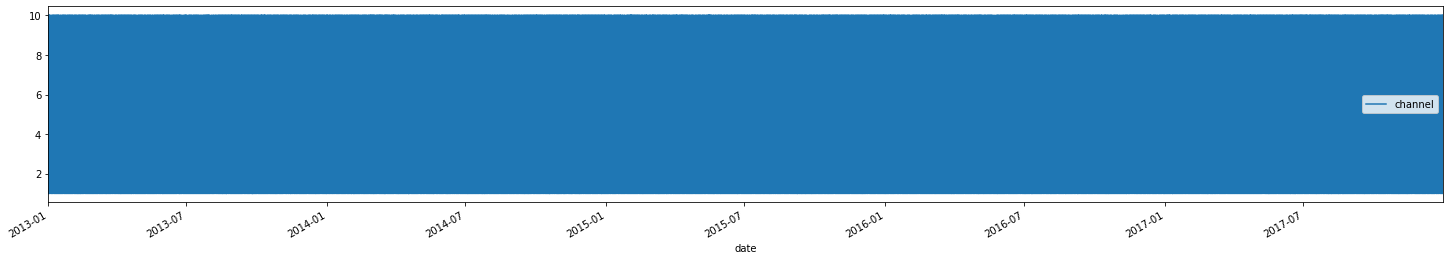

In [33]:
univariate_series_df.plot(figsize=(25,4))
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025CDF0E1A90>],
      dtype=object)

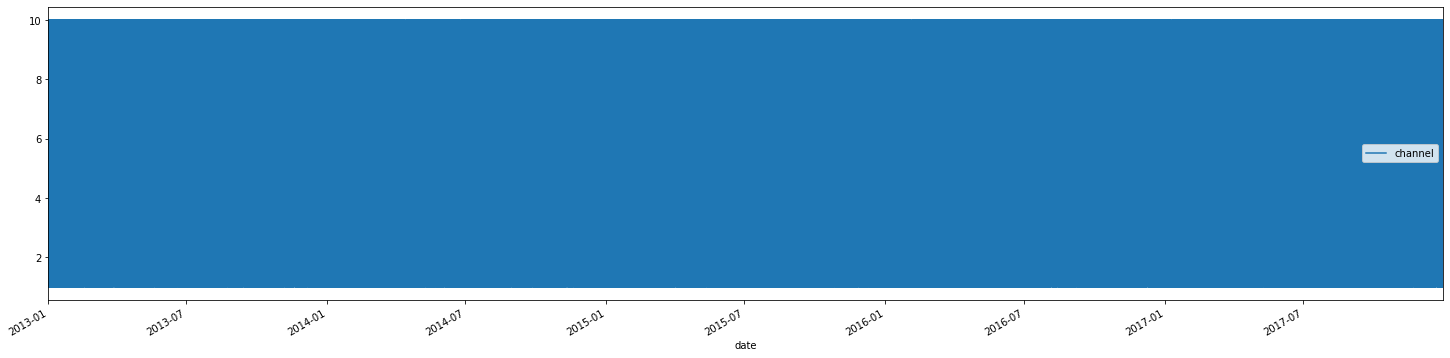

In [34]:
univariate_series_df.plot(subplots=True, figsize=(25,6))

In [35]:
# Get the sample records just to check the visual
sample_univariate_records_df = univariate_series_df.sample(100)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025CE9D356A0>],
      dtype=object)

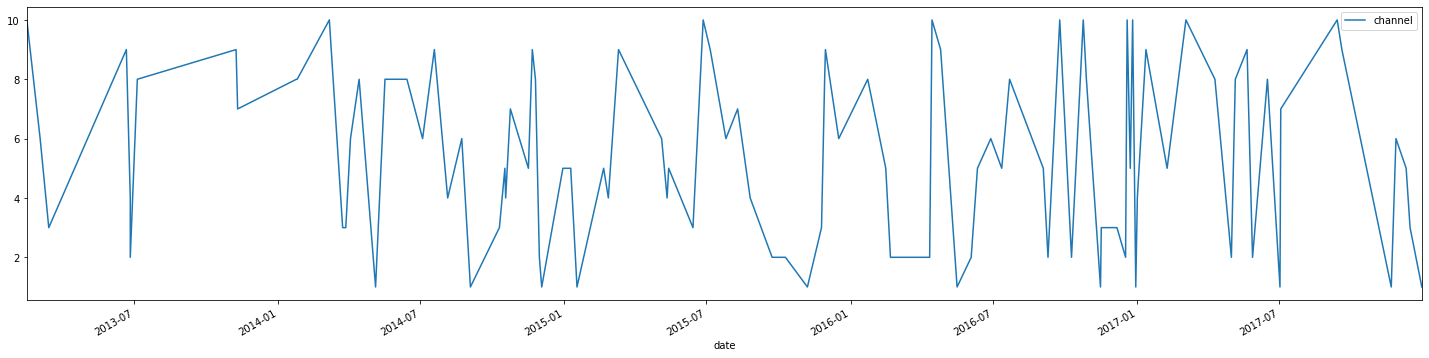

In [36]:
sample_univariate_records_df.plot(subplots=True, figsize=(25,6))

### Multivariate Time Series

In [37]:
multivariate_series_df.sample(5)

,channel,product,demand
date,,,
2015-12-01,9,31,31
2016-09-25,7,22,84
2016-11-06,3,49,55
2016-05-29,8,3,77
2014-01-18,9,49,26


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025CE1BF4160>,
      dtype=object)

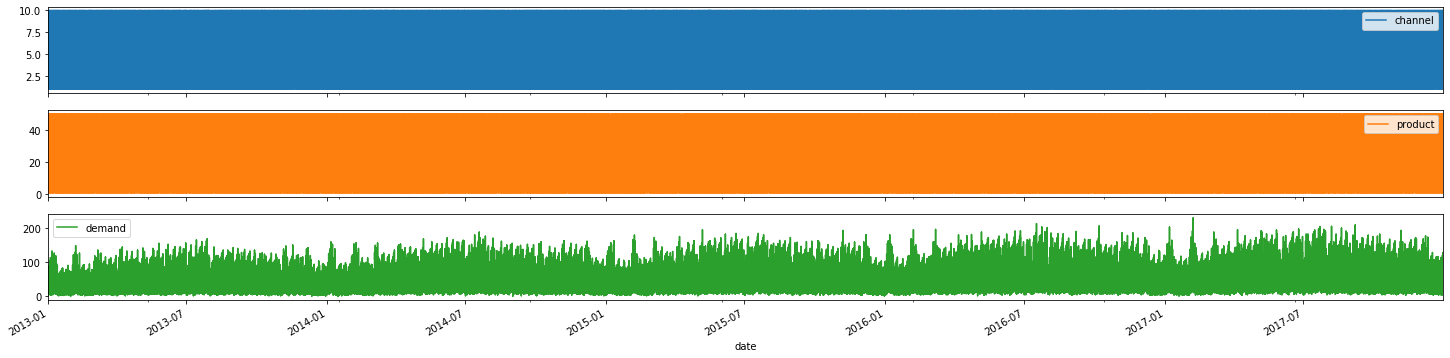

In [38]:
multivariate_series_df.plot(subplots=True, figsize=(25,6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025C813BCBE0>,
      dtype=object)

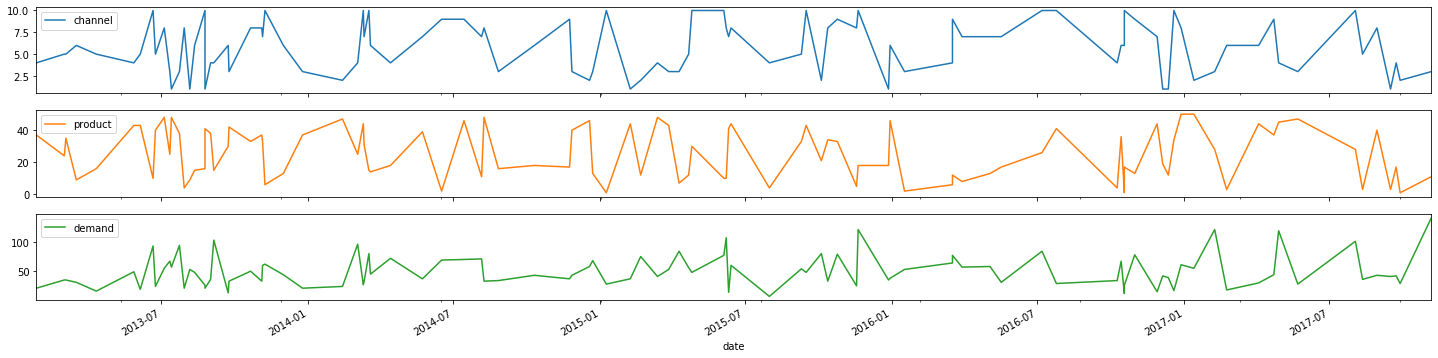

In [39]:
# Get the sample records just to check the visual
sample_multivariate_records_df = multivariate_series_df.sample(100)
sample_multivariate_records_df.plot(subplots=True, figsize=(25,6))

### Resampling

One common need for time series data is resampling at a higher or lower frequency by using either:
1. resample() method - this is data aggregation i.e. could be reporting average of previous year
2. asfreq() method - this is data selection i.e. could be reporting count of current year

We implement techniques to reduce data cadence. The high frequency noise will then will be eliminated through these techniques.

Resampling involves changing the frequency of your time series observations.

Types of Resampling techniques
1. Upsampling - This is when you increase the frequencies of the samples e.g. from days to hours or from hours to minutes or from minutes to seconds. Increasing frequencies leads to missing values
2. Downsampling - Downsampling is when you decrease the frequencies of the observations e.g from days to months or from months to years. Downsampling makes the data smoother

Main Reasons for resampling time series data
1. Problem Framing - when data is not available at the same frequency that you want to make predictions e.g. you have daily data but you want to solve a monthly problem
2. Feature Engineering - use observations and summaries of observations from both time scales and more in developing a model.


### Upsampling

Assuming we needed hourly demand per product per channel we will need to upsample the frequency from daily to hourly and use an interpolation technique to fill in the new hourly frequency

Using the pandas function interpolate() from a series object you will then create values for the generated values. Most common interpolation techniques are:
1. Linear
2. Polynomial
3. Spline
4. Last Observation Carried Forward (LOCF - ffill)
5. Next Observation Carried Backward (NOCB - bfill)

### Downsampling

##### Weekly Summaries

In [40]:
weekly_channel_summary = pd.DataFrame()
weekly_channel_summary['channel'] = multivariate_series_df.channel.resample('W').nunique()
weekly_channel_summary['demand'] = multivariate_series_df.demand.resample('W').sum()

In [41]:
weekly_channel_summary.head(5)

,channel,demand
date,,
2013-01-06,10,122538
2013-01-13,10,154410
2013-01-20,10,102950
2013-01-27,10,103298
2013-02-03,10,107782


In [42]:
weekly_product_summary = pd.DataFrame()
weekly_product_summary['product'] = multivariate_series_df["product"].resample('W').nunique()
weekly_product_summary['demand'] = multivariate_series_df.demand.resample('W').sum()

In [43]:
weekly_product_summary.head(5)

,product,demand
date,,
2013-01-06,50,122538
2013-01-13,50,154410
2013-01-20,50,102950
2013-01-27,50,103298
2013-02-03,50,107782


In [44]:
weekly_summary = pd.DataFrame()
weekly_summary['channel'] = multivariate_series_df.channel.resample('W').nunique()
weekly_summary['product'] = multivariate_series_df["product"].resample('W').nunique()
weekly_summary['demand'] = multivariate_series_df.demand.resample('W').sum()

In [45]:
weekly_summary.head(5)

,channel,product,demand
date,,,
2013-01-06,10,50,122538
2013-01-13,10,50,154410
2013-01-20,10,50,102950
2013-01-27,10,50,103298
2013-02-03,10,50,107782


In [46]:
weekly_summary.tail(5)

,channel,product,demand
date,,,
2017-12-03,10,50,190732
2017-12-10,10,50,220788
2017-12-17,10,50,174611
2017-12-24,10,50,155482
2017-12-31,10,50,155461


In [47]:
#Select only whole weeks
weekly_summary = weekly_summary.truncate(before='2013-01-07', after='2017-12-31')
weekly_summary.head(5)

,channel,product,demand
date,,,
2013-01-13,10,50,154410
2013-01-20,10,50,102950
2013-01-27,10,50,103298
2013-02-03,10,50,107782
2013-02-10,10,50,167436


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025C804217F0>,
      dtype=object)

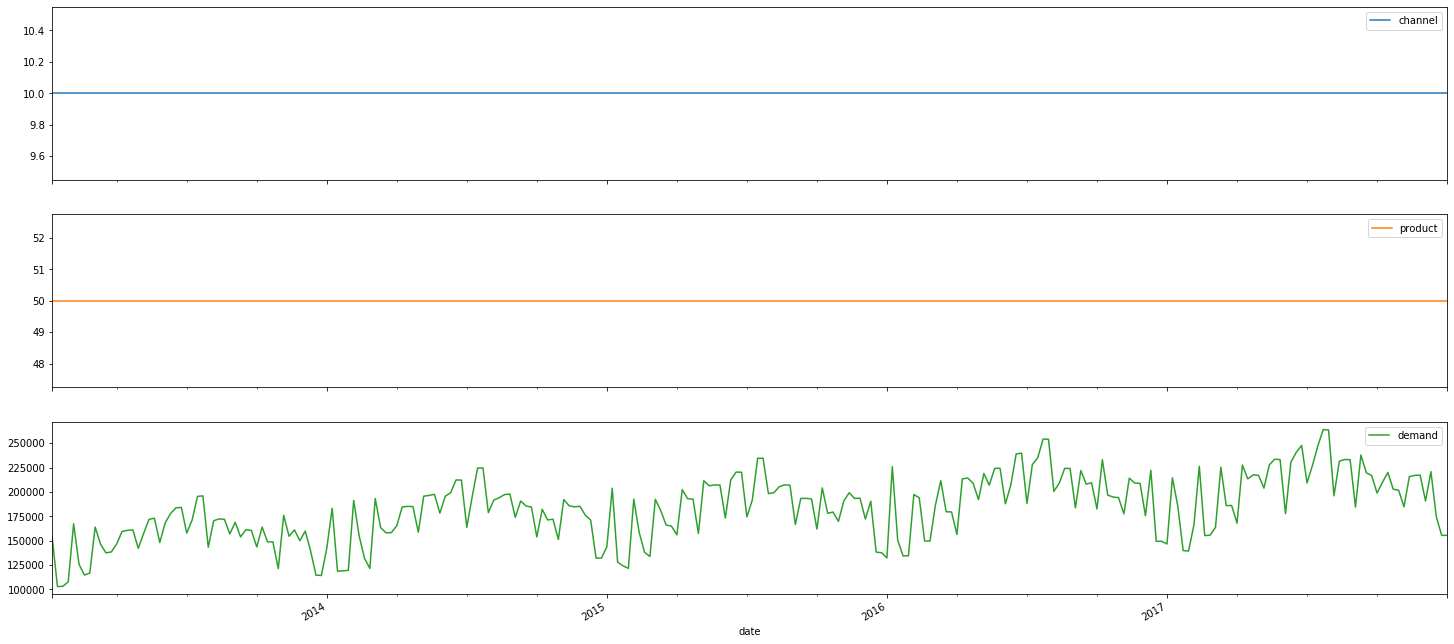

In [48]:
weekly_summary.plot(subplots=True, figsize=(25,12))

##### Monthly Summaries

In [49]:
monthly_summary = pd.DataFrame()
monthly_summary['channel'] = multivariate_series_df.channel.resample('M').nunique()
monthly_summary['product'] = multivariate_series_df["product"].resample('M').nunique()
monthly_summary['demand'] = multivariate_series_df.demand.resample('M').sum()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025C8022CF98>,
      dtype=object)

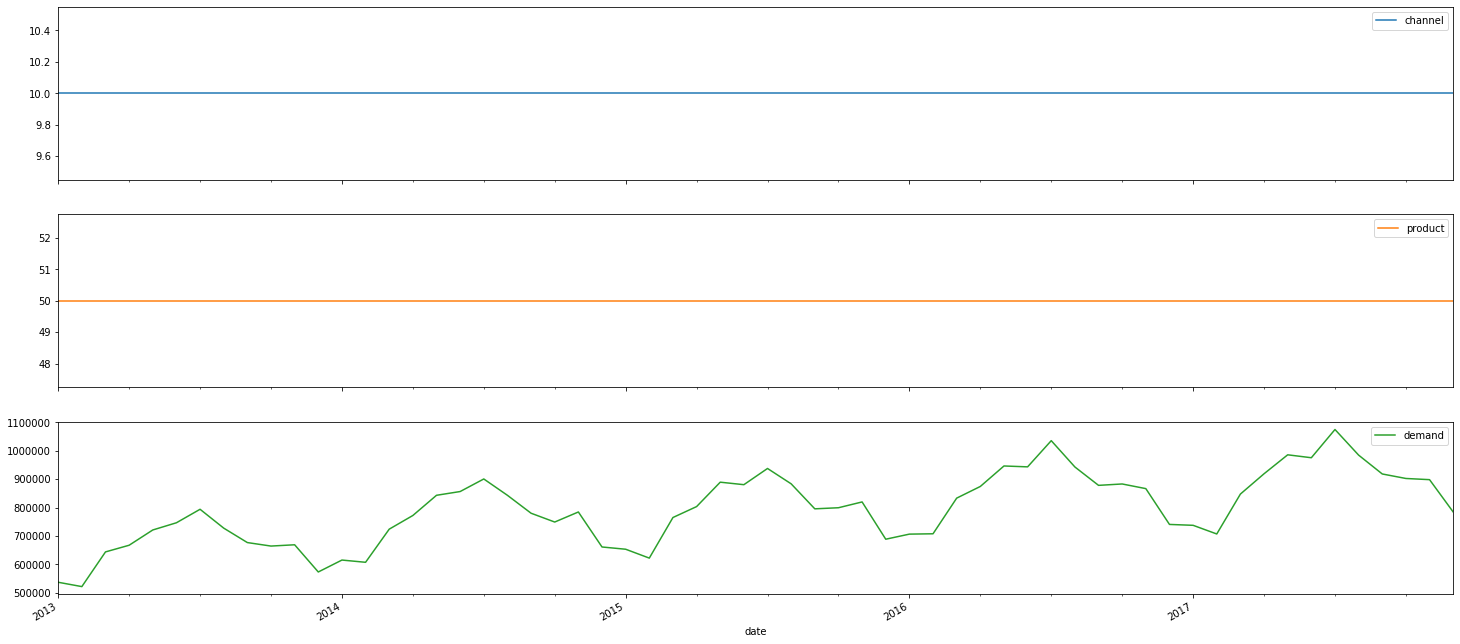

In [51]:
monthly_summary.plot(subplots=True, figsize=(25,12))

##### Quarterly Summaries

In [52]:
quarterly_summary = pd.DataFrame()
quarterly_summary['channel'] = multivariate_series_df.channel.resample('Q').nunique()
quarterly_summary['product'] = multivariate_series_df["product"].resample('Q').nunique()
quarterly_summary['demand'] = multivariate_series_df.demand.resample('Q').sum()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025C8083ECF8>,
      dtype=object)

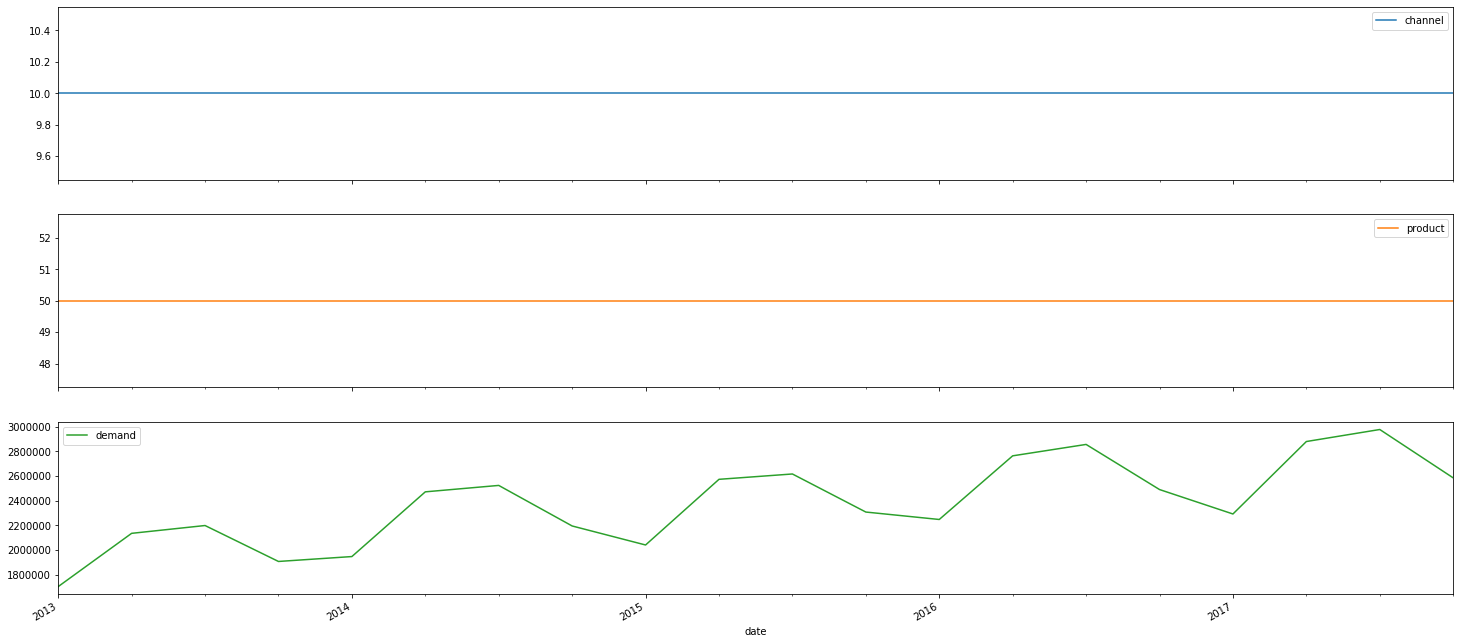

In [53]:
quarterly_summary.plot(subplots=True, figsize=(25,12))

##### Annual Summaries

In [54]:
annual_summary = pd.DataFrame()
annual_summary['channel'] = multivariate_series_df.channel.resample('AS').nunique()
annual_summary['product'] = multivariate_series_df["product"].resample('AS').nunique()
annual_summary['demand'] = multivariate_series_df.demand.resample('AS').sum()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025C810E4320>,
      dtype=object)

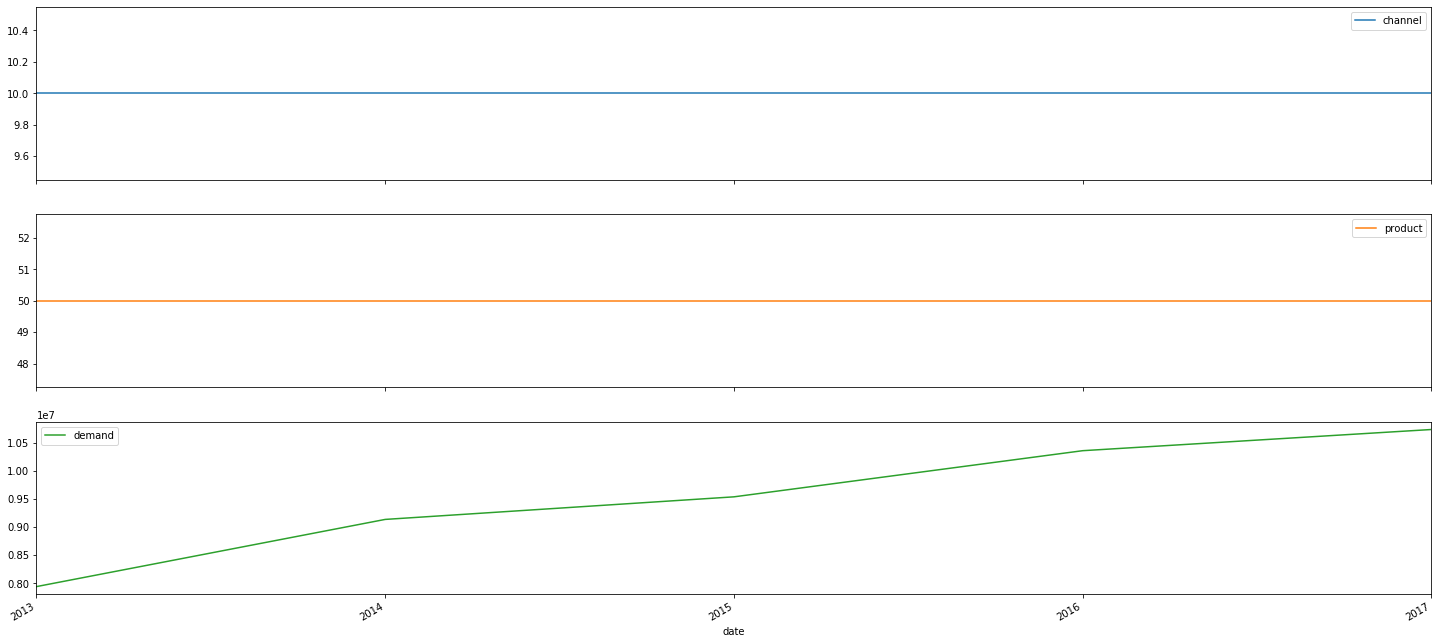

In [55]:
annual_summary.plot(subplots=True, figsize=(25,12))

## Window Statistics

### Rolling Window

For example if the size of the window is three, the first aggregation is done at the third row. Can be accomplished via the rolling() attribute of Series and DataFrame objects, which returns a view similar to what we saw with the groupby operation.

For instance one-year centered rolling mean and standard deviation of the the demand in this case.

Rolling calculations take the size of the window as the argument, whereas resampling takes a frequency specifier as the argument. Rolling calculations are like mean, standard deviation, median e.t.c

#### Rolling Mean

In [56]:
weekly_channel_summary["rolling_summ"] = weekly_channel_summary['demand'].rolling(3).sum()
weekly_channel_summary.head()

,channel,demand,rolling_summ
date,,,
2013-01-06,10,122538,NaN
2013-01-13,10,154410,NaN
2013-01-20,10,102950,379898.0
2013-01-27,10,103298,360658.0
2013-02-03,10,107782,314030.0


In [57]:
# implementing backward filling just for illustration purposes since in time series forward filling 
# makes more sense that backfilling
weekly_channel_summary["rolling_summ_backfilled"] = weekly_channel_summary["rolling_summ"].fillna(method='backfill')
weekly_channel_summary.head()

,channel,demand,rolling_summ,rolling_summ_backfilled
date,,,,
2013-01-06,10,122538,NaN,379898.0
2013-01-13,10,154410,NaN,379898.0
2013-01-20,10,102950,379898.0,379898.0
2013-01-27,10,103298,360658.0,360658.0
2013-02-03,10,107782,314030.0,314030.0


### Shifting

A common operation on time-series is  to shift or "lag" the values back and forth in time, such as to calculate the percentage change from sample to sample so as to make a comparison. There are two ways:
1. **shift** - shifts the data
2. **tshift** - shifts the time index

A common context for tshift is in computing differences over time For example using shifted values to compute the one-year return on investment for Google stock over the course of a given period and thus getting to know the most profitable times to invest in google stocks.

## Trend, Seasonality and Noise

1. **Trend** - this is a systematic, linear or non-linear component that changes over time and does not repeat
2. **Seasonality** - a general systematic linear or non-linear component that changes over time and repeats
3. **Noise** - a non-systematic component that is neither a trend not a season within the data



## Stationerity

The assumptions that the summary statistics of observations are consistent only applies to time series whenever the time series data is stationery. 

Addition of trend, seasonality and other time dependent structures violates this violates this assumption.

Trends can result in a varying mean over time, whereas seasonality can result in a changing variance over time, both defines a times series as being non-stationery.

**Stationary datasets** - this are those that have stable mean and stable variance and in turn are much easier to model. The observations in a stationary time series are not dependent on time.

Statistical modeling methods assume or require the time series to be stationary.

**Non Stationery datasets** - 

## Differencing

Is a technique used to make non-stationery datasets to be stationery.

### Notes